# Hvor mye avkastning bringer risiko?
## Return of a geometric brownian motion with no risk

Selv en med brownian uten drift vil bringe gjennomsnittlig positiv avkastning så lenge markedet er flyktig ettersom 

$ GB_t = exp(\mu t + \sigma B_t) $  

$ E[GB_t] = exp(\mu t + \frac{1}{2}\sigma^2) $  

$ VAR[GB_t] = [\exp(\sigma^2)-1]\exp(2\mu +\sigma^2) $  

Median (og geometrisk gjennomsnitt) = $exp(\mu)$

Dette er sant under eksponensiell vekst siden oppsidens oppside er større enn nedsidens nedside.

Så hvor stor er denne effekten?

In [1]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, 'Return per year')

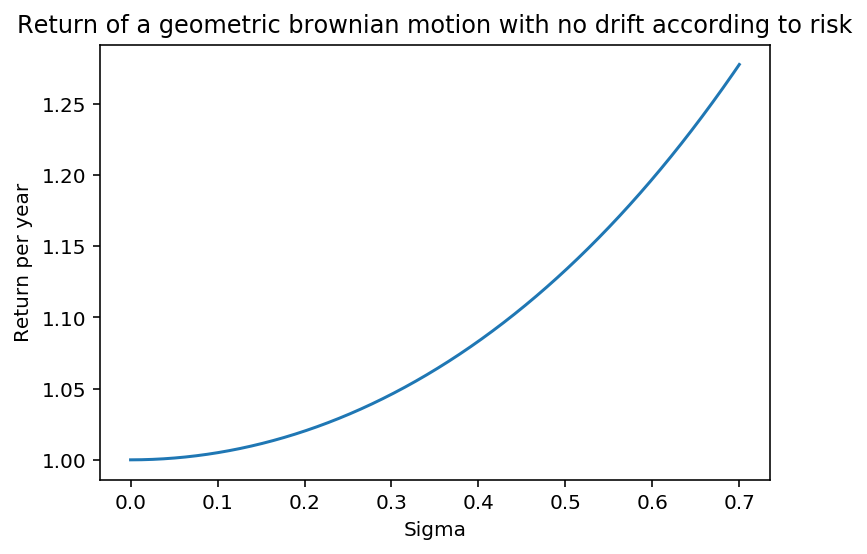

In [146]:
sigmas = np.linspace(0, 0.7, 1000)
#std_lognormal = np.sqrt((np.exp(sigmas**2)-1)*np.exp(2*mu + sigmas**2))
mean_return = np.exp(0.5*sigmas**2)

plt.plot(sigmas, mean_return)
#plt.plot(std_lognormal[:800], mean_return[:800], "--")
plt.title("Return of a geometric brownian motion with no drift according to risk")
plt.xlabel("Sigma")
#plt.xlabel("Sigma/St.d deviation")
plt.ylabel("Return per year")
#plt.legend(["Sigma", "St.d deviation"])

Text(0, 0.5, 'Return per year')

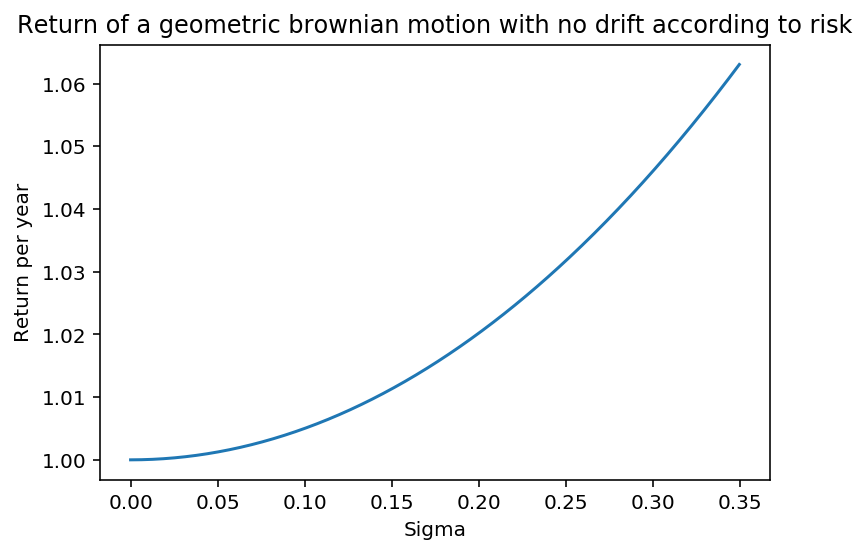

In [145]:
plt.plot(sigmas[0:500], mean_return[0:500])
plt.title("Return of a geometric brownian motion with no drift according to risk")
plt.xlabel("Sigma")
plt.ylabel("Return per year")

Text(0, 0.5, 'Return per year')

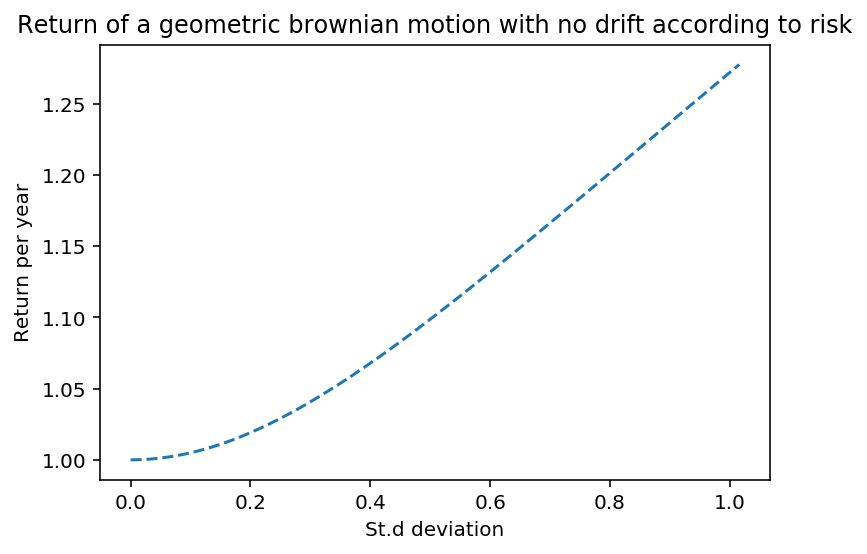

In [138]:
sigmas = np.linspace(0, 0.7, 1000)
std_lognormal = np.sqrt((np.exp(sigmas**2)-1)*np.exp(2*mu + sigmas**2))
mean_return = np.exp(0.5*sigmas**2)

#plt.plot(sigmas, mean_return)
plt.plot(std_lognormal, mean_return, "--")
plt.title("Return of a geometric brownian motion with no drift according to risk")
plt.xlabel("St.d deviation")
plt.ylabel("Return per year")

## S&P500
Standard devation of S&P500 from 1928–2015: 19.7%

In [35]:
sigma = 0.197
r = np.exp(0.5*sigma**2)
r_percent = (r - 1) * 100
print("Return S&P500 from volaitility: %.02f%%" % r_percent)

Return S&P500 from volaitility: 1.96%


## 10 brownian motions with no drift and st.d. = 50% 

De fleste aksjene/prosjektene holder seg omtrent rundt null og median = 0. Likevel bringer prosjektene ganske mye avkastning renters renter eller oppsidens oppside kan bli ganske stor i snitt er ganske positiv.

1.0412471249264468
1.0040008357238943


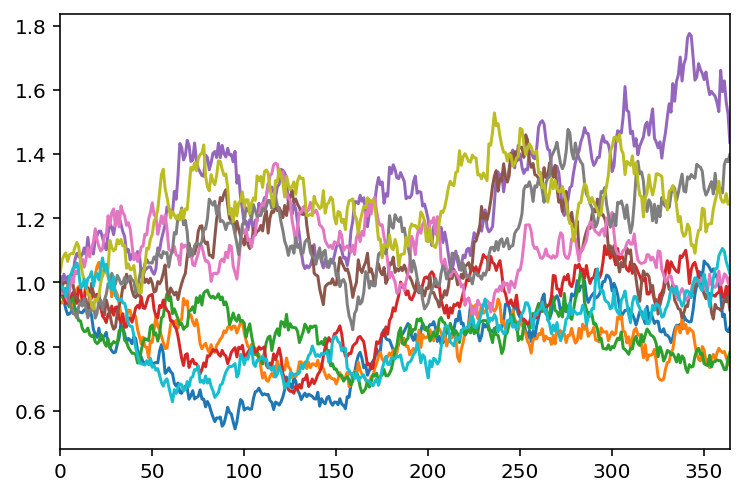

In [37]:
dt = 1.0/365
t_end = 1
mean = 0
sigma = 0.50


dW_t = lambda mean, sigma, dt, t_end: norm.rvs(loc = mean*dt, scale=sigma*np.sqrt(dt), size=int(t_end/dt))
paths = [pd.Series(np.exp(np.cumsum(dW_t(mean, sigma, dt, t_end)))) for _ in range(10)]
ends = [path.iloc[-1] for path in paths]
for path in paths:
    path.plot()
    
print(np.mean(ends)) # Forventet = 13.31%
print(np.median(ends)) # Forventet = 0

## Like stor return hvis du har en samling brownian motions?
Burde være like stor
... og det ser det også ut til å være

Text(0, 0.5, 'Return per year')

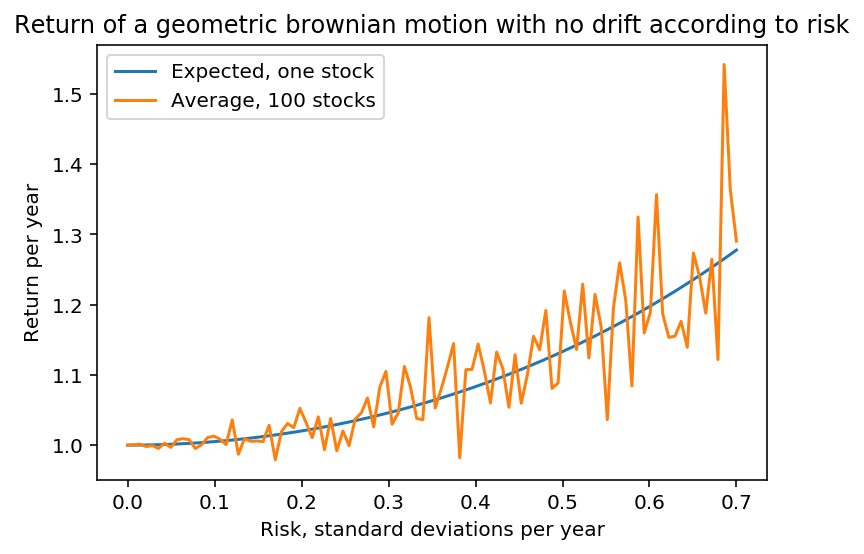

In [24]:
def l(mean, sigma, stocks = 100):
    n = stocks
    dt = 1.0/365
    t_end = 1
    ends = [np.exp(np.cumsum(dW_t(mean, sigma, dt, t_end)))[-1] for _ in range(n)]
    average = sum(ends) / len(ends)
    return average

sigmas2 = np.linspace(0, 0.7, 100)
mean_returns = [l(0, sigma, stocks = 100) for sigma in sigmas2]
plt.plot(sigmas, mean_return)
plt.plot(sigmas2, mean_returns)
plt.title("Return of a geometric brownian motion with no drift according to risk")
plt.xlabel("Risk, standard deviations per year")
plt.ylabel("Return per year")
plt.legend(["Expected, one stock", "Average, 100 stocks"])

In [97]:
print("Mean and st.d. from S&P500 1928–2015 (which we assume is a lognormal distribution)")
m, s = 1.114122, 0.197028
print("%.04f %.04f" % (m, s))

mu = np.log(m) - 0.5*np.log((s/m)**2 + 1)
sigma = np.sqrt(np.log((s/m)**2 + 1))
print()
print("What is the instantanious return per year mu and instatanious volatility per year sigma?")
print("%.04f %.04f" % (mu, sigma))

print()
print("Check if formulas work:")
#mu = 0.0927
#sigma = 0.1755
mean_lognormal = np.exp(mu+0.5*sigma**2)
std_lognormal = np.sqrt((np.exp(sigma**2)-1)*np.exp(2*mu + sigma**2))
print("%.04f %.04f" % (mu, sigma))
print("%.04f %.04f" % (mean_lognormal, std_lognormal))

Mean and st.d. from S&P500 1928–2015 (which we assume is a lognormal distribution)
1.1141 0.1970

What is the instantanious return per year mu and instatanious volatility per year sigma?
0.0927 0.1755

Check if formulas work:
0.0927 0.1755
1.1141 0.1970


Text(0, 0.5, 'Standard deviation of log.normal')

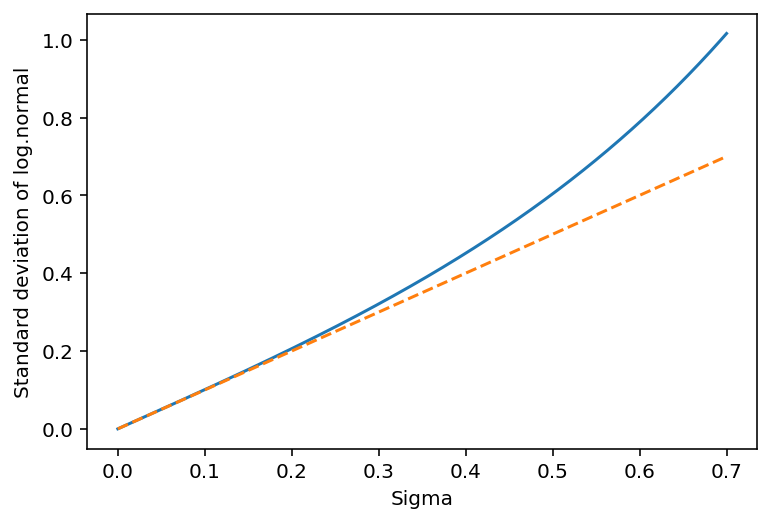

In [128]:
mu = 0
sigmas = np.linspace(0, 0.7, 1000)
std_lognormal = np.sqrt((np.exp(sigmas**2)-1)*np.exp(2*mu + sigmas**2))
plt.plot(sigmas, std_lognormal)
plt.plot(sigmas, sigmas, "--")
plt.title("")
plt.xlabel("Sigma")
plt.ylabel("Standard deviation of log.normal")
#plt.axis('equal')
#plt.axis([0.0, 1.5, 0.0, 1.0])